### Step 1 Load data into data frame

In [2]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox


file = tk.Tk()
file.withdraw()

file_path = filedialog.askopenfilename(
    title="Select a CSV file to load",
    filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
)

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)
file.destroy()
print('Finished loading dataframe')

Finished loading dataframe


### Step 2 Pick week before Holiday

In [4]:
# Define the date range
start_date = '01-01-2022'
end_date = '12-31-2022'

# Filter the DataFrame for the date range
filtered_df_holiday = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

# Print the shape of the filtered DataFrame
print(filtered_df_holiday.shape)


(2374142, 8)


### Step 3 Sort the data by dates

In [6]:
sorted_df_2022 = filtered_df_holiday.sort_values(by='date', ascending=False)


### Step 4 Check the rating distribution

<Axes: title={'center': 'Rating reviews week of Chrismas 2022'}>

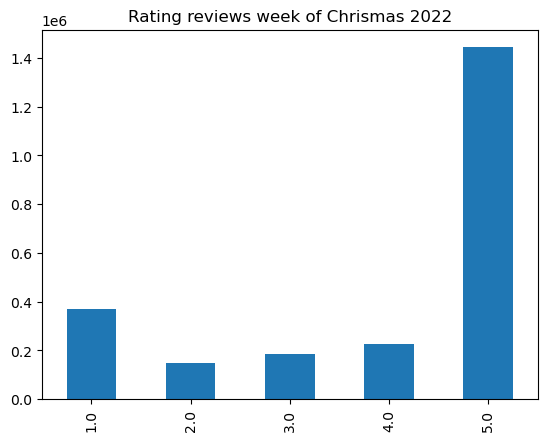

In [8]:
#Score Column evaluation ref one line pltot from: https://mode.com/python-tutorial/counting-and-plotting-in-python
sorted_df_2022['rating'].value_counts().sort_index().plot(kind='bar', title='Rating reviews week of Chrismas 2022')

### Step 5 Load nltk dependencies

In [10]:
#Load Dependencies
import nltk
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 6 Vader Sentiment Analyis

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyizer_object = SentimentIntensityAnalyzer()

### Step 7 Sample test to ensure sentiment analysis matches the text

In [14]:
pd.set_option('display.max_colwidth', None)

#Grab sample text
sample_text = sorted_df_2022['text'].sample(n=1).iloc[0]
#Get Sent Score
score_sent = sentiment_analyizer_object.polarity_scores(sample_text)
print(sample_text+'\n')
print(score_sent)


So I’m really confused because the first couple of times I ordered this product it did not look like this. The first couple ones I got were dark in color, chunky and smelled like fish. I have no idea if it’s supposed to look like this or like what I had in the past but according to the other reviews I saw what I was giving my dog in the past was expired. Not sure what to think about this

{'neg': 0.15, 'neu': 0.812, 'pos': 0.038, 'compound': -0.6238}


In [15]:
sorted_df_2022

,rating,text,asin,timestamp,parent_asin,title,main_category,date
541425,5.0,Sleepy kitty,B018BVZFG8,2022-12-31 03:36:57.891,B08NX9HYHG,FELIWAY Classic Cat Calming Pheromone Spray (60 mL),Pet Supplies,12-31-2022
67771,1.0,Does not deter cat from peeing in same spot. Don’t waste your money.,B071ZMGPKV,2022-12-31 20:33:07.668,B08DLSNGXN,"Nature's Miracle P-98154 Cat Stain and Odor Remover, Melon Burst Scent, Enzymatic Formula for Urine Stains, Feces Stains, Vomit Stains and Drool Stains, Odor Control, 128 fl oz",Pet Supplies,12-31-2022
2089513,5.0,"I like the product it gets dirty quick, and the guinea pigs tend to chew it up but it’s again a good product.",B08MTJCBPK,2022-12-31 18:43:23.693,B08MTJCBPK,Rabbit Hay Feeder Guinea Pig Hay Feeder Bag Bunny Hay Holder Storage for Small Animal Chinchilla Hamsters,Pet Supplies,12-31-2022
1978364,2.0,"Nice height, assembly was easy but I really don’t like the way it slants forward. Fine for the food but when my dog drinks his water it’s a mess.",B09NRBS7CZ,2022-12-31 04:39:02.095,B09NRBS7CZ,"Simpnew Adjustable Elevated Dog Bowls, Dog Bowl Stand, Adjustable Raised Dog Bowls,Double Dog Food Bowls Stand, with 2 Stainless Steel Bowls for Medium and Small Dogs (Large Dogs)",Pet Supplies,12-31-2022
590593,5.0,Great cow sound…dog loves it,B0002ARTWU,2022-12-31 19:07:00.254,B087QM531F,"Multipet International Look Who's Talking Cat Toy, Fish, 1-1/4-Inch, Multi-Colored, 3"", Small",Pet Supplies,12-31-2022
...,...,...,...,...,...,...,...,...
590395,1.0,My dogs destroyed this thing and this was inside! Please tell me how this is safe for a “dog toy”??? Dogs could swallow the batteries so easy. This is unbelievably dangerous and shouldn’t be advertised as a medium dog toy! Who would think to read reviews for a stuffed dog toy. Absolutely ridiculous!,B002GPD9WS,2022-01-01 02:36:18.785,B087QM531F,"Multipet International Look Who's Talking Cat Toy, Fish, 1-1/4-Inch, Multi-Colored, 3"", Small",Pet Supplies,01-01-2022
5276,2.0,"So far it has only 2 noises it makes, suppose to make over 20...haven't heard more than 2...pretty disappointing....",B000MNEFGK,2022-01-01 20:53:53.762,B0BP7J7FXJ,Pet Qwerks Talking Babble Ball - Interactive Chew Dog Toy - Large,Pet Supplies,01-01-2022
1830569,5.0,She was very comfortable in it that I’m b,B09H6WDPPC,2022-01-01 00:15:26.500,B09CT4HWYM,Fitwarm Fuzzy Sherpa Dog Winter Clothes Dog Hoodie Dresses Thermal Skirt Girl Doggie Dress Thick Jacket Puppy Outfits Coat Cat Sweatshirt Apparel Purple Large,Pet Supplies,01-01-2022
409022,1.0,"I bought this hoping that because it's lightweight it would be easier on me, but this caused me a lot of cleaning headaches. The litter is so fine and lightweight that the cats were throwing it out of the box every time they tried to cover.<br /><br />The litter didn't clump, either. I clean the litter more than once a day, but it seems that whenever the cats used this, the clumps would disintegrate whenever I cleaned it. It caused a big mess.<br /><br />Honestly, it wasn't worth switching and I'm going back to my usual flushable litter. This stuff was awful.",B08W9JV32Z,2022-01-01 21:34:49.432,B0BL82N1GZ,"Cat's Pride Lightweight Clumping Cat Litter 10 Pounds, Easy Scoop",Pet Supplies,01-01-2022


### Step 8 For loop to run sentiment analysis and save in a new res dictionary

In [17]:
### Run the polarity score on the entire dataset

sorted_df_2022['text'] = sorted_df_2022['text'].astype(str)

res = {}
#Appliyng for loop through dictionairy for the plarity scores
#https://www.nltk.org/howto/sentiment.html
for i, row in tqdm(sorted_df_2022.iterrows(), total=len(sorted_df_2022)):
    text = row['text']
    #print(text)
    res[i] = sentiment_analyizer_object.polarity_scores(text)

  0%|          | 0/2374142 [00:00<?, ?it/s]

### Step 9 Save dictionary into a dataframe and print it out

In [19]:
vaders_christmas_2022 = pd.DataFrame(res).T
vaders_christmas_2022

,neg,neu,pos,compound
541425,0.000,1.000,0.000,0.0000
67771,0.189,0.811,0.000,-0.4215
2089513,0.076,0.705,0.219,0.5647
1978364,0.093,0.629,0.278,0.6670
590593,0.000,0.278,0.722,0.8316
...,...,...,...,...
590395,0.169,0.690,0.140,-0.4331
5276,0.000,1.000,0.000,0.0000
1830569,0.000,0.661,0.339,0.5563
409022,0.084,0.851,0.065,-0.4654


### Step 10 Merge the vader dataset with Neg/Neu/Pos compound fields with the original 2022 sorted data set

In [21]:
#Flip the dataframe
vaders_christmas_2022 = pd.DataFrame(res).T
#Merge the vader and sorted dataframe based on the index
merged_christmas_2022 = pd.merge(vaders_christmas_2022, sorted_df_2022, left_index=True, right_index=True)

In [22]:
merged_christmas_2022

,neg,neu,pos,compound,rating,text,asin,timestamp,parent_asin,title,main_category,date
541425,0.000,1.000,0.000,0.0000,5.0,Sleepy kitty,B018BVZFG8,2022-12-31 03:36:57.891,B08NX9HYHG,FELIWAY Classic Cat Calming Pheromone Spray (60 mL),Pet Supplies,12-31-2022
67771,0.189,0.811,0.000,-0.4215,1.0,Does not deter cat from peeing in same spot. Don’t waste your money.,B071ZMGPKV,2022-12-31 20:33:07.668,B08DLSNGXN,"Nature's Miracle P-98154 Cat Stain and Odor Remover, Melon Burst Scent, Enzymatic Formula for Urine Stains, Feces Stains, Vomit Stains and Drool Stains, Odor Control, 128 fl oz",Pet Supplies,12-31-2022
2089513,0.076,0.705,0.219,0.5647,5.0,"I like the product it gets dirty quick, and the guinea pigs tend to chew it up but it’s again a good product.",B08MTJCBPK,2022-12-31 18:43:23.693,B08MTJCBPK,Rabbit Hay Feeder Guinea Pig Hay Feeder Bag Bunny Hay Holder Storage for Small Animal Chinchilla Hamsters,Pet Supplies,12-31-2022
1978364,0.093,0.629,0.278,0.6670,2.0,"Nice height, assembly was easy but I really don’t like the way it slants forward. Fine for the food but when my dog drinks his water it’s a mess.",B09NRBS7CZ,2022-12-31 04:39:02.095,B09NRBS7CZ,"Simpnew Adjustable Elevated Dog Bowls, Dog Bowl Stand, Adjustable Raised Dog Bowls,Double Dog Food Bowls Stand, with 2 Stainless Steel Bowls for Medium and Small Dogs (Large Dogs)",Pet Supplies,12-31-2022
590593,0.000,0.278,0.722,0.8316,5.0,Great cow sound…dog loves it,B0002ARTWU,2022-12-31 19:07:00.254,B087QM531F,"Multipet International Look Who's Talking Cat Toy, Fish, 1-1/4-Inch, Multi-Colored, 3"", Small",Pet Supplies,12-31-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
590395,0.169,0.690,0.140,-0.4331,1.0,My dogs destroyed this thing and this was inside! Please tell me how this is safe for a “dog toy”??? Dogs could swallow the batteries so easy. This is unbelievably dangerous and shouldn’t be advertised as a medium dog toy! Who would think to read reviews for a stuffed dog toy. Absolutely ridiculous!,B002GPD9WS,2022-01-01 02:36:18.785,B087QM531F,"Multipet International Look Who's Talking Cat Toy, Fish, 1-1/4-Inch, Multi-Colored, 3"", Small",Pet Supplies,01-01-2022
5276,0.000,1.000,0.000,0.0000,2.0,"So far it has only 2 noises it makes, suppose to make over 20...haven't heard more than 2...pretty disappointing....",B000MNEFGK,2022-01-01 20:53:53.762,B0BP7J7FXJ,Pet Qwerks Talking Babble Ball - Interactive Chew Dog Toy - Large,Pet Supplies,01-01-2022
1830569,0.000,0.661,0.339,0.5563,5.0,She was very comfortable in it that I’m b,B09H6WDPPC,2022-01-01 00:15:26.500,B09CT4HWYM,Fitwarm Fuzzy Sherpa Dog Winter Clothes Dog Hoodie Dresses Thermal Skirt Girl Doggie Dress Thick Jacket Puppy Outfits Coat Cat Sweatshirt Apparel Purple Large,Pet Supplies,01-01-2022
409022,0.084,0.851,0.065,-0.4654,1.0,"I bought this hoping that because it's lightweight it would be easier on me, but this caused me a lot of cleaning headaches. The litter is so fine and lightweight that the cats were throwing it out of the box every time they tried to cover.<br /><br />The litter didn't clump, either. I clean the litter more than once a day, but it seems that whenever the cats used this, the clumps would disintegrate whenever I cleaned it. It caused a big mess.<br /><br />Honestly, it wasn't worth switching and I'm going back to my usual flushable litter. This stuff was awful.",B08W9JV32Z,2022-01-01 21:34:49.432,B0BL82N1GZ,"Cat's Pride Lightweight Clumping Cat Litter 10 Pounds, Easy Scoop",Pet Supplies,01-01-2022


### Step 11 Plot vader compound score vs the rating

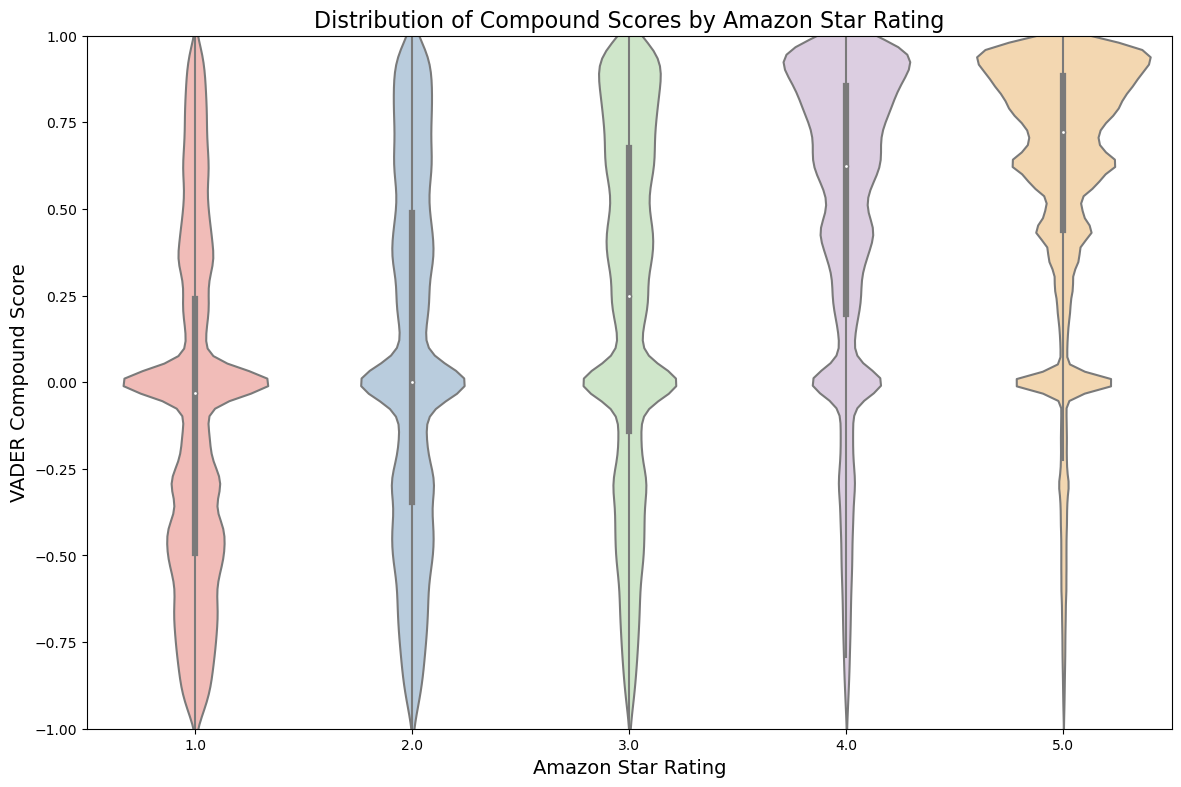

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 9))
#https://seaborn.pydata.org/generated/seaborn.violinplot.html#
sns.violinplot(data=merged_christmas_2022, x='rating', y='compound', palette='Pastel1')
plt.title('Distribution of Compound Scores by Amazon Star Rating', fontsize=16)
plt.xlabel('Amazon Star Rating', fontsize=14)
plt.ylabel('VADER Compound Score', fontsize=14)
plt.ylim(-1, 1)
plt.show()
